In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import json

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('notebook')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image

For the subjects that have received enough classifications to retire
- what fraction of subjects pass a threshold to be confident in the consensus result? 
- Could you provide your ‘expert classification’ for a subset and compare your expert classification with the consensus result? 
    - How well does the consensus result match up with your expert classification? Any stats/info that you think can be helpful for me to show how well (or not well) our museum guests do would be helpful.
- What is the current retirement limit? Do you think that should be increased/decreased/stay the same based on the results so far? A

In [3]:
df = pd.read_csv('touch_table_subject_reductions_2019_10_15.csv')

In [4]:
df.head()

,id,reducer_key,workflow_id,subject_id,created_at,updated_at,subgroup,lock_version,reducible_id,reducible_type,data.0,data.1,data.2
0,31463358,T0_Stats,11308,30088075,2019-07-09 19:18:19 UTC,2019-10-07 15:16:01 UTC,_default,5,11308,Workflow,6.0,NaN,1.0
1,31463992,T0_Stats,11308,30087878,2019-07-09 19:24:31 UTC,2019-09-29 18:19:49 UTC,_default,10,11308,Workflow,6.0,4.0,1.0
2,31468444,T0_Stats,11308,30085221,2019-07-09 20:05:17 UTC,2019-10-15 20:03:51 UTC,_default,10,11308,Workflow,6.0,3.0,2.0
3,31468451,T0_Stats,11308,34084204,2019-07-09 20:05:23 UTC,2019-07-29 17:34:31 UTC,_default,7,11308,Workflow,NaN,5.0,3.0
4,31470164,T0_Stats,11308,30089260,2019-07-09 20:27:03 UTC,2019-09-21 20:06:28 UTC,_default,4,11308,Workflow,NaN,6.0,1.0


In [5]:
df = df.rename(columns={'id': 'extract_id_do_not_use', 'data.0': 'smooth', 'data.1': 'featured', 'data.2': 'artifact'})

In [6]:
df = df.fillna(0)

In [7]:
df['subject_id'] = df['subject_id'].astype(str)

In [8]:
df['total'] = df['smooth'] + df['featured'] + df['artifact']
for col in ['smooth', 'featured', 'artifact']:
    df[col + '_fraction'] = df[col] / df['total']

In [9]:
df.head()

,extract_id_do_not_use,reducer_key,workflow_id,subject_id,created_at,updated_at,subgroup,lock_version,reducible_id,reducible_type,smooth,featured,artifact,total,smooth_fraction,featured_fraction,artifact_fraction
0,31463358,T0_Stats,11308,30088075,2019-07-09 19:18:19 UTC,2019-10-07 15:16:01 UTC,_default,5,11308,Workflow,6.0,0.0,1.0,7.0,0.857143,0.000000,0.142857
1,31463992,T0_Stats,11308,30087878,2019-07-09 19:24:31 UTC,2019-09-29 18:19:49 UTC,_default,10,11308,Workflow,6.0,4.0,1.0,11.0,0.545455,0.363636,0.090909
2,31468444,T0_Stats,11308,30085221,2019-07-09 20:05:17 UTC,2019-10-15 20:03:51 UTC,_default,10,11308,Workflow,6.0,3.0,2.0,11.0,0.545455,0.272727,0.181818
3,31468451,T0_Stats,11308,34084204,2019-07-09 20:05:23 UTC,2019-07-29 17:34:31 UTC,_default,7,11308,Workflow,0.0,5.0,3.0,8.0,0.000000,0.625000,0.375000
4,31470164,T0_Stats,11308,30089260,2019-07-09 20:27:03 UTC,2019-09-21 20:06:28 UTC,_default,4,11308,Workflow,0.0,6.0,1.0,7.0,0.000000,0.857143,0.142857


Text(0,0.5,'Galaxies')

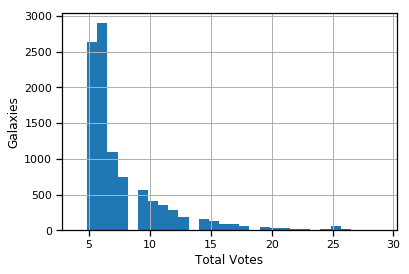

In [10]:
df.query('total < 30')['total'].hist(bins=30)
plt.xlabel('Total Votes')
plt.ylabel('Galaxies')

In [11]:
df10 = df.query('total >= 10')
len(df10)

2053

Text(0,0.5,'Galaxies')

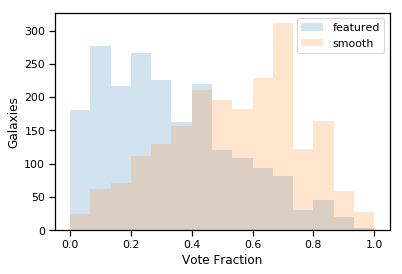

In [12]:
alpha = 0.2
plt.hist(df10['featured_fraction'], bins=15, alpha=alpha, label='featured')
plt.hist(df10['smooth_fraction'], bins=15, alpha=alpha, label='smooth')
# plt.hist(df['artifact_fraction'], bins=10, alpha=alpha, label='artifact')
plt.legend()
plt.xlabel('Vote Fraction')
plt.ylabel('Galaxies')

(array([3998., 2357., 1817.,  701.,  551.,  382.,   97.,   32.,   52.,
          13.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

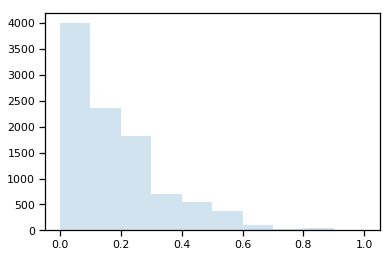

In [13]:
plt.hist(df['artifact_fraction'], bins=10, alpha=alpha, label='artifact')

In [14]:
cdf = pd.read_csv('touch_table_classifications_2019-10-15.csv')

EmptyDataError: No columns to parse from file

In [ ]:
cdf.head()

In [ ]:
subject_data =  [json.loads(x) for x in cdf['subject_data'].unique()]

In [ ]:
subject_data[0]

In [ ]:
def flatten_subject(subject):
    subject_id = list(subject.keys())[0]
    subject_data = subject[subject_id]
    subject_data.update({'subject_id': subject_id})
    return subject_data.copy()

In [ ]:
flatten_subject(subject_data[0])

In [ ]:
subject_data_flat = [flatten_subject(subject) for subject in subject_data]

In [ ]:
subject_df = pd.DataFrame(data=subject_data_flat)

In [ ]:
subject_df.head()

In [ ]:
subject_df.columns.values

In [ ]:
subject_df_mini = subject_df[['!file_loc', '!ra', '!dec', 'subject_id']]

In [ ]:
master_df = pd.merge(df, subject_df_mini, on='subject_id', how='inner')
assert len(df) == len(master_df)

In [ ]:
master_df.iloc[-1]

In [ ]:
def quality_check(df, retirement_limit, n_bins=10, n_galaxies_per_bin=10):
    df = df.query('total >= {}'.format(retirement_limit)).sort_values('total', ascending=True)
    print('Retired: {}'.format(len(df)))
    df = df.dropna(subset=['!file_loc'])
    df['local_file_loc'] = df['!file_loc'].astype(str).apply(lambda x: '/media/mike' + x[8:])
    df['binned_vf'], bins = pd.cut(df['featured_fraction'], n_bins, labels=False, retbins=True)
    print(bins)
    print(df['binned_vf'].value_counts())
    
    scale = 3
    plt.figure(figsize=(scale * n_galaxies_per_bin, scale * n_bins))
    gs1 = gridspec.GridSpec(n_galaxies_per_bin, n_bins)
    gs1.update(wspace=0.0, hspace=0.0)
    for bin_n in range(n_bins):
        selected_df = df.query('binned_vf == {}'.format(bin_n))
        for galaxy_n in range(n_galaxies_per_bin):
            if galaxy_n < len(selected_df):
                galaxy = selected_df.iloc[galaxy_n]
                image = Image.open(galaxy['local_file_loc'])
                ax = plt.subplot(gs1[galaxy_n, bin_n])
                ax.imshow(image)
                ax.text(50, 50, 'Feat = {:.2f}'.format(galaxy['featured_fraction']), fontsize=16, color='r')
                ax.text(50, 120, 'N = {}'.format(galaxy['total']), fontsize=16, color='r')
                if galaxy_n == 0:
                    ax.text(80, -50, 'Feat: {:.2f} to {:.2f}'.format(bins[bin_n], bins[bin_n + 1]), fontsize=16, color='black')
                ax.axis('off')
    plt.savefig('touch_table_retirement_{}.pdf'.format(retirement_limit))
    return df

In [ ]:
df_ret20 = quality_check(master_df, retirement_limit=20)

Roughly, below 20% or above 45% are reliably smooth/featured.

In [ ]:
df_ret10 = quality_check(master_df, retirement_limit=10)

In [ ]:
df_ret10['is_smooth'] = df_ret10['featured_fraction'] < .25 
df_ret10['is_featured'] = df_ret10['featured_fraction'] > .50
print(df_ret10['is_smooth'].value_counts())
print(df_ret10['is_featured'].value_counts())
print(len(df_ret10))

In [ ]:
len(master_df.query('total > 25'))

In [ ]:
master_df['total'].max()

Below 20% or 50%+

In [ ]:
_ = quality_check(master_df, retirement_limit=5)

Below 20 or above 50